In [54]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [55]:
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [56]:
cs = ["2018_03_21_slide_31","2018_03_21_slide_69"]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)


In [57]:
reload(a2)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [58]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(20).clean()
frames = []
for n, d in data.spots_pd.groupby("Ligand Batch"):
    
    tukey = pairwise_tukeyhsd(endog=d["Intensity"], groups=d["Analyte Batch"])
    frames.append(pd.Series({"Ligand Batch":n,"Distinct Groups":np.count_nonzero(tukey.reject)}))
pepsig = pd.concat(frames, axis=1).transpose().sort_values(by="Distinct Groups", ascending=False)
lb = pd.Series(pepsig["Distinct Groups"].values,index=pepsig["Ligand Batch"])  
#lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

In [59]:
lb

Ligand Batch
P117         61
P114         58
P065         57
P125         56
P048         55
P060         55
Nenad        54
P009         53
P047         52
P102         52
LF-0.0001    52
P055         51
P007         51
LF-0.001     50
P008         50
P105         50
P072         50
P082         49
P116         49
P073         49
P066         49
P076         49
P128         49
P088         49
LF-0.5       49
P057         48
P044         48
P012         48
P090         48
P071         48
             ..
P052         42
P056         42
P115         42
P106         41
P123         41
P045.3       41
P118         41
LF-0.05      41
LF-0.01      41
P130         39
P120         39
P059         38
P132         37
P095         37
P119         36
P086         36
P050         35
P094         35
P103         34
P054         34
P135         33
P136         33
P075         32
P121         30
P134         25
P098         24
P122         23
P067         23
P083         23
P089         12
Length: 85,

In [60]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
10485,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),834.316476,1499.070569,0.784091,2018_03_21_slide_30,microarray_2018_03_21,38.0,14.0,quant1,0
10485,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),834.316476,1499.070569,0.784091,2018_03_21_slide_30,microarray_2018_03_21,38.0,14.0,quant1,1
10485,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),834.316476,1499.070569,0.784091,2018_03_21_slide_30,microarray_2018_03_21,38.0,14.0,quant1,2
10453,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),234.923810,264.911726,0.425000,2018_03_21_slide_30,microarray_2018_03_21,45.0,2.0,quant1,3
10485,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),834.316476,1499.070569,0.784091,2018_03_21_slide_30,microarray_2018_03_21,38.0,14.0,quant1,4
10671,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),574.427406,1578.848681,0.613636,2018_03_21_slide_30,microarray_2018_03_21,26.0,8.0,quant1,5
10676,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),361.239748,377.992363,0.500000,2018_03_21_slide_30,microarray_2018_03_21,20.0,5.0,quant1,6
10267,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),393.048940,662.046659,0.420455,2018_03_21_slide_30,microarray_2018_03_21,57.0,8.0,quant1,7
10830,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),603.730964,1033.560847,0.416667,2018_03_21_slide_30,microarray_2018_03_21,14.0,2.0,quant1,8
10578,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),210.300885,221.950959,0.475000,2018_03_21_slide_30,microarray_2018_03_21,32.0,11.0,quant1,9


In [61]:
data.x

Ligand Batch                                                    LF-0.0001  \
Analyte Batch                     Collection          Replica               
A/Aichi/2/68(H3N2)-X31-2018-04-13 2018_03_21_slide_58 0         66.717563   
                                                      1         89.316456   
                                                      2        109.716814   
                                                      3         75.926424   
                                                      4         89.316456   
                                                      5        109.716814   
                                                      6         66.477876   
                                                      7         66.717563   
                                                      8         77.802083   
                                                      9         66.477876   
                                                      10        82.935127   
                                                      11        82.935127   
                                                      12        82.935127   
                                                      13        77.996044   
                                                      14        82.935127   
                                                      15        77.996044   
                                                      16        89.316456   
                                                      17        66.477876   
                                                      18        89.316456   
                                                      19       109.716814   
                                  2018_03_21_slide_63 0         71.646018   
                                                      1         71.941176   
                                                      2         61.635285   
                                                      3         61.635285   
                                                      4         77.177215   
                                                      5         74.642857   
                                                      6         63.635417   
                                                      7         56.435127   
                                                      8         74.642857   
                                                      9         74.642857   
...                                                                   ...   
VicAlla-2018-04-13                2018_03_21_slide_67 10       125.007911   
                                                      11       116.327434   
                                                      12       103.771361   
                                                      13       143.182741   
                                                      14       144.787611   
                                                      15       154.261076   
                                                      16       113.076142   
                                                      17       154.261076   
                                                      18       143.182741   
                                                      19       113.076142   
                                  2018_03_21_slide_68 0        171.370253   
                                                      1        147.021361   
                                                      2        117.844937   
                                                      3        147.021361   
                                                      4        108.407080   
                                                      5        144.330696   
                                                      6        147.021361   
                                                      7        147.021361   
                                                      8        147.021361

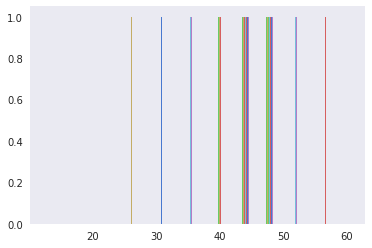

In [62]:
plt.hist(lb)
plt.show()

In [63]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]


In [64]:
col = data.spots_pd["Collection"].unique()

train_test =[ tuple(col),tuple(col)]


In [65]:
cs = data.spots_pd["Collection"].unique()

In [66]:

complete = pd.DataFrame(columns=["Test", "Train"])
import itertools

test = list(itertools.product(*data.collection_in_virbatch().values()))

for i, row in enumerate(test[:50]):
    complete.set_value(i, "Test", row)
    complete.set_value(i, "Train", tuple(set(cs) - set(row)))



/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [67]:
complete

,Test,Train
0,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_37, 2018_03_21_slide_60, 201..."
1,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_53, 2018_03_21_slide_37, 201..."
2,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_53, 2018_03_21_slide_37, 201..."
3,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_50, 2018_03_21_slide_37, 201..."
4,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_53, 2018_03_21_slide_50, 201..."
5,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_53, 2018_03_21_slide_50, 201..."
6,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_50, 2018_03_21_slide_37, 201..."
7,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_53, 2018_03_21_slide_50, 201..."
8,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_53, 2018_03_21_slide_50, 201..."
9,"(2018_03_21_slide_67, 2018_03_21_slide_59, 201...","(2018_03_21_slide_37, 2018_03_21_slide_60, 201..."


In [69]:
pbs_len

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

In [68]:
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/analysis2.py'>

In [70]:
frames = []
#spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(20).clean()
#data = clean()

for pb in pbs:
    ana = a2.Analysis(data.subset_ligand_batches(pb),train_test=complete)
    ana.calculate_all()
    frames.append(ana.complete_information())


*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predic

*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****AdaBoost*****
*****Fit Models*****
**

In [33]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")


In [142]:
frames_NN = []
frames_DT = []
frames_AB =[]
for frame in frames:
    first = frame[:13000]
    second =  frame[13000:26000]
    third  =  frame[26000:]
    frames_NN.append(first)
    frames_DT.append(second)
    frames_AB.append(third)


    

In [168]:
result = pd.concat(frames_NN, keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")

In [169]:
result["TrueFalse"].value_counts()

1    588347
0    503653
Name: TrueFalse, dtype: int64

In [170]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)


In [171]:
#result_m_mean = result_m.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean().reset_index()



In [172]:
result_mean["Name"] = "Mean" 
def add_range(df):
    df["unit"]=range(len(df))
    return df

result_mean = result_mean.groupby("Peptide Batches").apply(add_range)

In [173]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
import seaborn as sns


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



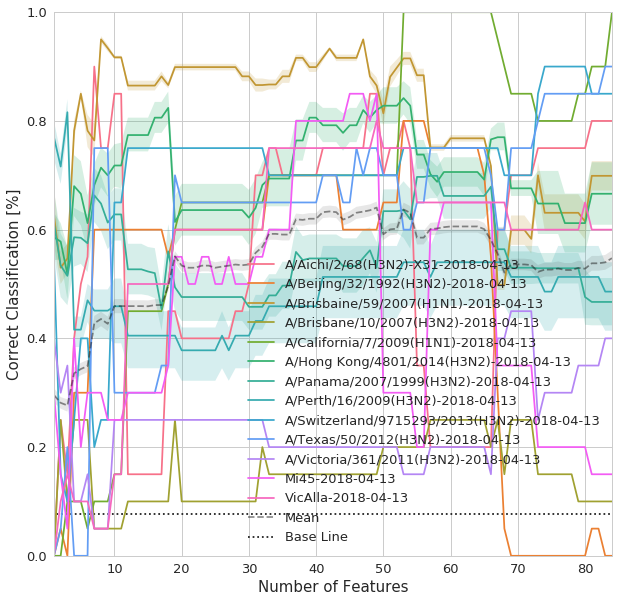

In [174]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True )
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
#ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Analyte Batch", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="unit", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)

ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



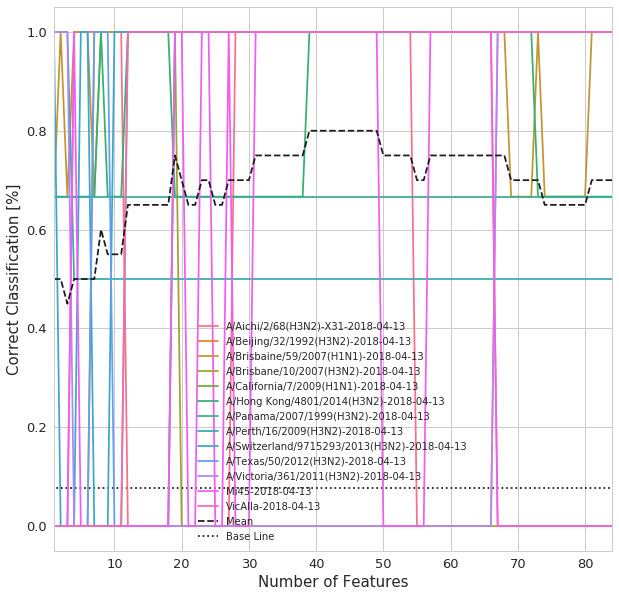

In [175]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 

ax.plot(x,y,c="k",linestyle="--", label = "Mean")
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
plt.legend()

#ax.set_ylim(0,1.1)
plt.show()

In [ ]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [129]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning:

The following kwargs were not used by contour: 'label'



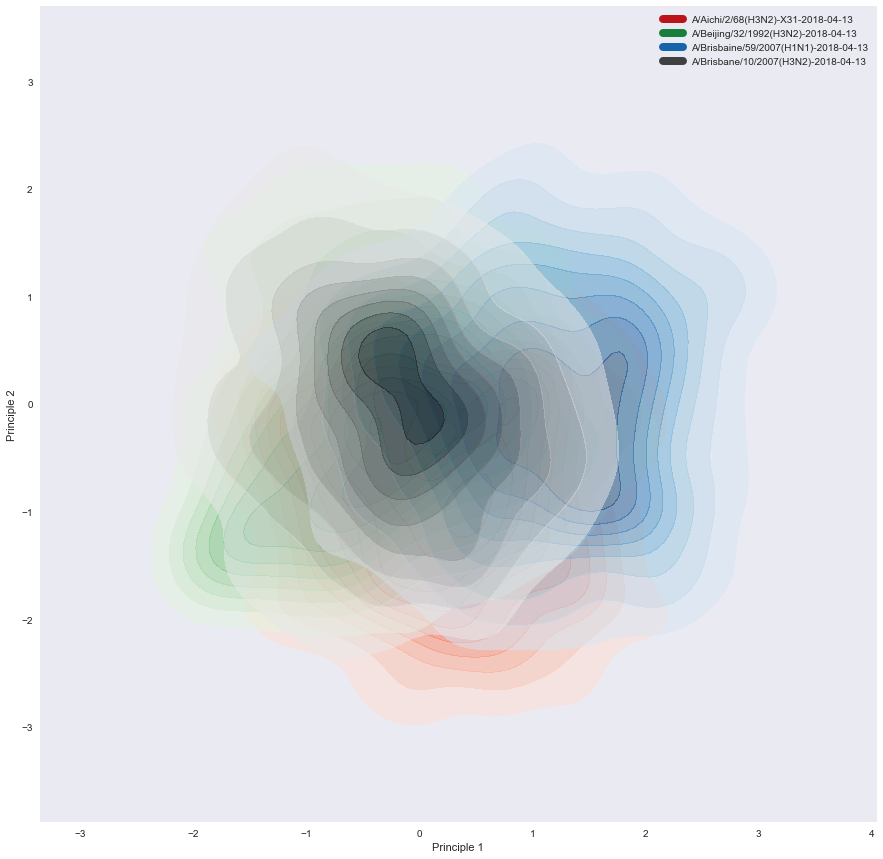

In [130]:

fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [46]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing

2.5.1


In [196]:
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(20).clean()


In [197]:
test_data = data.x_lda_fit().transform(data.x)


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing



In [198]:
le = preprocessing.LabelEncoder()

In [199]:
le.fit(data.y_names)
cs = le.transform(data.y_names)

In [200]:
colors =cs.astype(float) / cs.max()

In [201]:
data.y_names

array(['A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2

In [207]:


import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    text = data.y_names,
    mode='markers',
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.3
    )
)

this = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [78]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

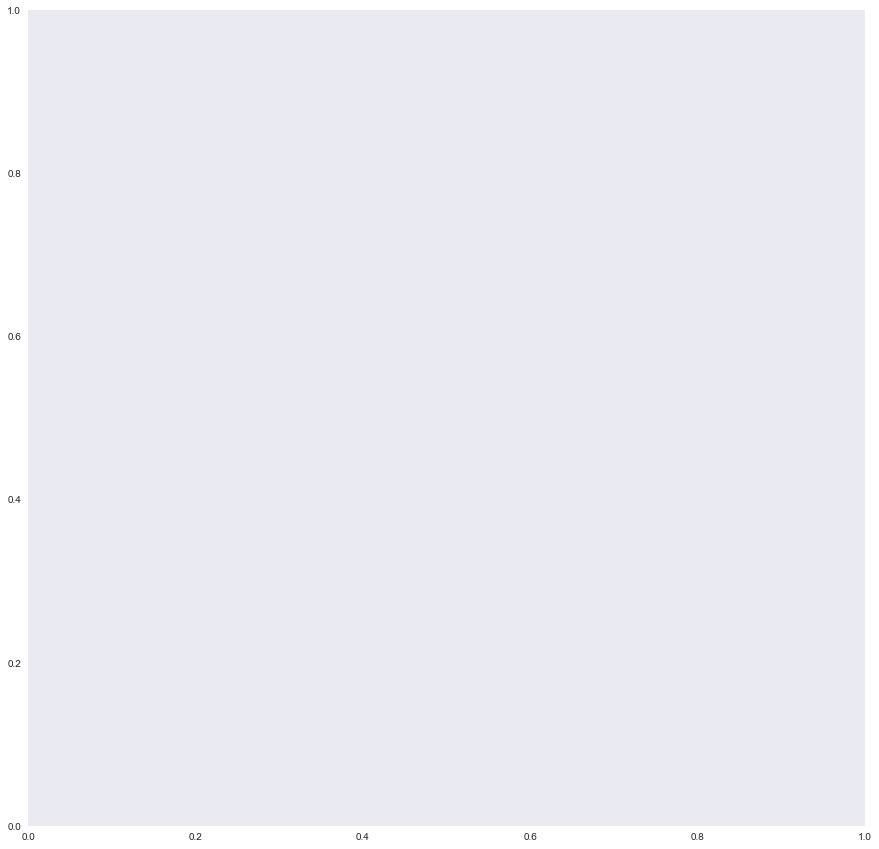

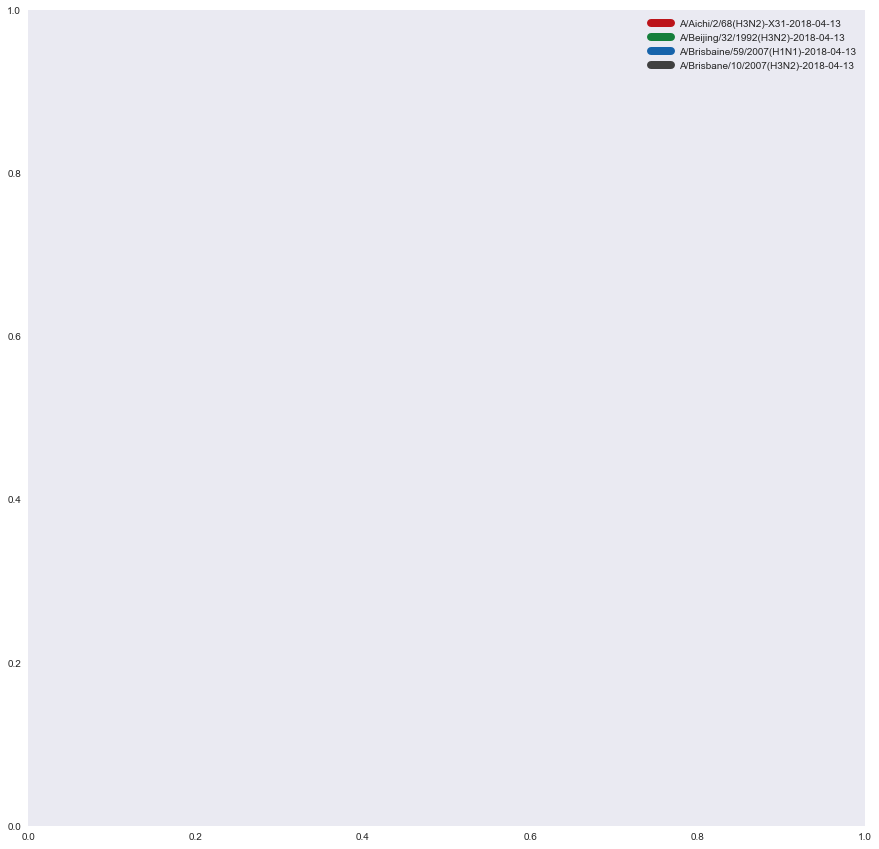

In [79]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

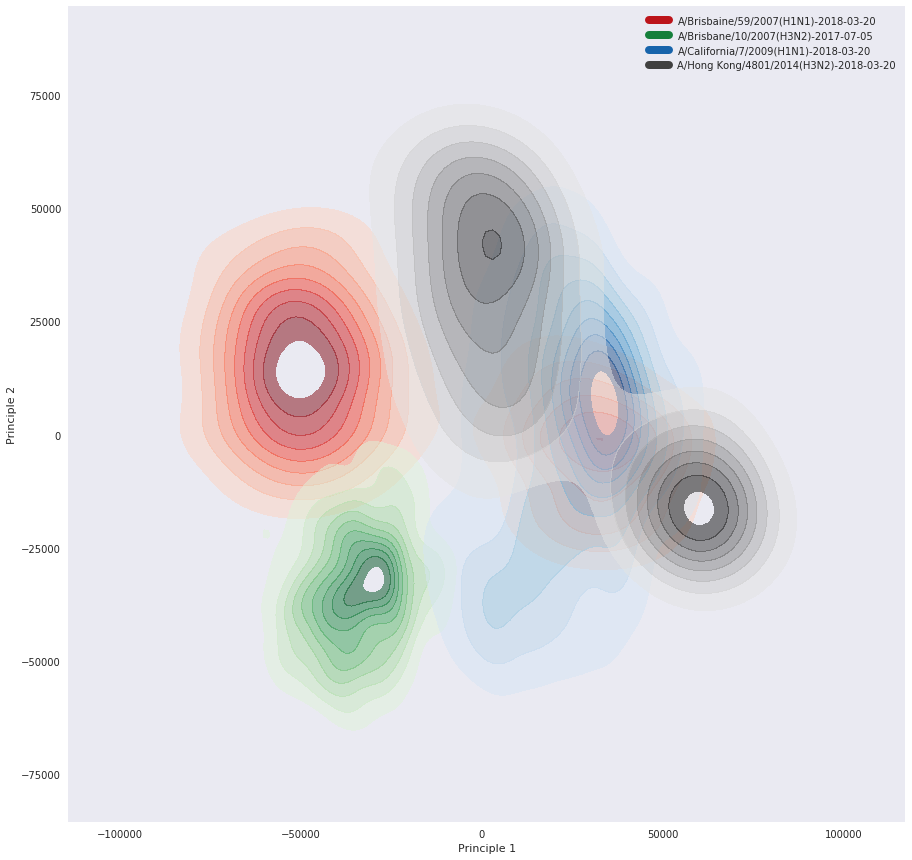

In [652]:
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()